In [7]:
import pandas as pd

STORE = "MONGODB"

IN_FILE = "out.csv"

data = None

if STORE == "MONGODB":
    import pymongo
    mongo_client = pymongo.MongoClient()
    mongo_db = mongo_client.tls_survey
    mongo_docs = mongo_db.sites.find({}, {'_id': 0}) # Get all entries but not the id
    data = pd.DataFrame(list(mongo_docs))
    
elif STORE == "CSV":
    data = pd.read_csv(IN_FILE)

In [8]:
data

,answer_malformed,http_version,site,ssl_cipher
0,404IN,2,google.com,TLS_AES_256_GCM_SHA384
1,404,2,youtube.com,TLS_AES_256_GCM_SHA384


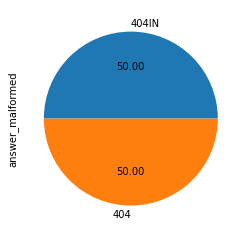

In [9]:
data["answer_malformed"].value_counts().plot.pie(autopct='%.2f');

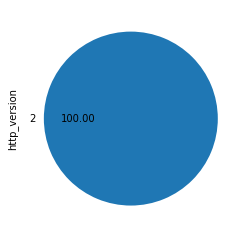

In [10]:
data["http_version"].value_counts().plot.pie(autopct='%.2f');

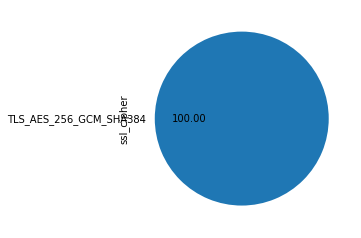

In [5]:
data["ssl_cipher"].value_counts().plot.pie(autopct='%.2f');